In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import time

In [2]:
mktcap = pd.read_excel('./데이터/시가총액.xlsx')

In [3]:
mktcap

,Symbol,A005930,A373220,A000660,A207940,A035420,A006400,A005380,A035720,A051910,...,A900060,A900080,A900090,A900130,A900150,A900180,A950010,A950030,A950070,A950100
0,Symbol Name,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,NAVER,삼성SDI,현대차,카카오,LG화학,...,중국식품포장,에스앤씨엔진그룹,차이나하오란,웨이포트,성융광전투자,완리,평산차업 KDR,네프로아이티,중국고섬,SBI모기지
1,Kind,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,...,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC
2,Item,S420002300,S420002300,S420002300,S420002300,S420002300,S420002300,S420002300,S420002300,S420002300,...,S420002300,S420002300,S420002300,S420002300,S420002300,S420002300,S420002300,S420002300,S420002300,S420002300
3,Item Name,시가총액 (보통-상장예정주식수 포함)(백만원),시가총액 (보통-상장예정주식수 포함)(백만원),시가총액 (보통-상장예정주식수 포함)(백만원),시가총액 (보통-상장예정주식수 포함)(백만원),시가총액 (보통-상장예정주식수 포함)(백만원),시가총액 (보통-상장예정주식수 포함)(백만원),시가총액 (보통-상장예정주식수 포함)(백만원),시가총액 (보통-상장예정주식수 포함)(백만원),시가총액 (보통-상장예정주식수 포함)(백만원),...,시가총액 (보통-상장예정주식수 포함)(백만원),시가총액 (보통-상장예정주식수 포함)(백만원),시가총액 (보통-상장예정주식수 포함)(백만원),시가총액 (보통-상장예정주식수 포함)(백만원),시가총액 (보통-상장예정주식수 포함)(백만원),시가총액 (보통-상장예정주식수 포함)(백만원),시가총액 (보통-상장예정주식수 포함)(백만원),시가총액 (보통-상장예정주식수 포함)(백만원),시가총액 (보통-상장예정주식수 포함)(백만원),시가총액 (보통-상장예정주식수 포함)(백만원)
4,Frequency,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,...,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2022-01-31 00:00:00,437585061,105300000,87724285,48895935,50855216,40158486,40490121,37902009,45108507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,2022-02-28 00:00:00,430421322,96408000,89908292,55444546,52167609,37682962,37391933,41965029,39884674,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,2022-03-31 00:00:00,415496865,103428000,85904279,58860898,55858713,40983660,38567108,47512088,37555126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,2022-04-30 00:00:00,402363344,97578000,81900266,59643812,47000063,42015128,39742283,40119709,36637426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def mktrtn(data):
    temp = data.T
    result = []
    twoMonths=pd.DataFrame()
    for i in range(5,len(data)-1):
        twoMonths = pd.concat([temp[i],temp[i+1]],axis=1,join='inner')
        twoMonths = twoMonths.dropna()
        rtn=((twoMonths[i+1][1:]).sum()/(twoMonths[i][1:]).sum())*100-100
        result.append(rtn)
    return result

In [5]:
Rm = mktrtn(mktcap)
Rm

[-14.140655296735531,
 -3.877127480791117,
 -0.3938244274700651,
 -18.075537068932903,
 0.6501576590314073,
 11.012357099752904,
 -15.776983025783494,
 -2.3502725070672597,
 -11.316367190560698,
 -15.984020159376229,
 -2.3865154832397764,
 -3.9174385263362552,
 27.019857411943775,
 -6.914845836147691,
 -9.897168397002119,
 10.914994768785235,
 6.918148011051329,
 -2.4791118084318384,
 -8.805692006393855,
 -0.8247749591793934,
 -12.361845701982432,
 13.587224707580688,
 18.16828475661501,
 7.159557329450948,
 8.677420493355697,
 8.151942306663429,
 11.09690765915758,
 -9.371641100913536,
 -4.89533683979549,
 -6.697831602540518,
 -3.0986268460317348,
 2.5617177567512073,
 -13.0703378676655,
 2.317815890852188,
 9.716609908026584,
 -12.331985715148974,
 -5.55074162302067,
 -2.81064846916442,
 -6.53391074216654,
 12.589145069102898,
 6.237105444687302,
 5.873913603662714,
 5.678227356729224,
 5.758155839247365,
 -8.069545246453956,
 11.404862997315007,
 3.8167642936615067,
 2.1363968303260

In [6]:
Rm = pd.DataFrame(Rm, columns=['Rm'])
Rm

,Rm
0,-14.14
1,-3.88
2,-0.39
3,-18.08
4,0.65
...,...
264,-10.78
265,1.47
266,3.05
267,-2.52


In [7]:
Rm = pd.DataFrame(Rm['Rm'].shift(1))
Rm

,Rm
0,NaN
1,-14.14
2,-3.88
3,-0.39
4,-18.08
...,...
264,5.51
265,-10.78
266,1.47
267,3.05


In [8]:
dataset = pd.read_excel('./데이터/팩터금리.xlsx')

In [9]:
dataset = pd.concat([dataset,Rm],axis=1)
dataset

,Symbol,3FM.2B3.SMB,3FM.2B3.HML,Economy,Rm
0,1999-12-31,-8.87,-21.96,4.79,NaN
1,2000-01-31,-2.82,9.30,4.78,-14.14
2,2000-02-29,49.52,-14.32,5.07,-3.88
3,2000-03-31,8.00,8.06,5.05,-0.39
4,2000-04-30,-7.23,4.85,5.06,-18.08
...,...,...,...,...,...
265,2022-01-31,3.43,7.26,1.28,-10.78
266,2022-02-28,1.28,1.67,1.39,1.47
267,2022-03-31,4.59,-0.68,1.45,3.05
268,2022-04-30,1.76,5.30,1.53,-2.52


In [10]:
dataset.columns = ['Symbol','SMB', 'HML', 'Rf','Rm']
dataset

,Symbol,SMB,HML,Rf,Rm
0,1999-12-31,-8.87,-21.96,4.79,NaN
1,2000-01-31,-2.82,9.30,4.78,-14.14
2,2000-02-29,49.52,-14.32,5.07,-3.88
3,2000-03-31,8.00,8.06,5.05,-0.39
4,2000-04-30,-7.23,4.85,5.06,-18.08
...,...,...,...,...,...
265,2022-01-31,3.43,7.26,1.28,-10.78
266,2022-02-28,1.28,1.67,1.39,1.47
267,2022-03-31,4.59,-0.68,1.45,3.05
268,2022-04-30,1.76,5.30,1.53,-2.52


In [11]:
dataset['Rm-Rf']=dataset['Rm']-dataset['Rf']
dataset = dataset[['Symbol','Rm','Rf','Rm-Rf','SMB','HML']]
dataset

,Symbol,Rm,Rf,Rm-Rf,SMB,HML
0,1999-12-31,NaN,4.79,NaN,-8.87,-21.96
1,2000-01-31,-14.14,4.78,-18.92,-2.82,9.30
2,2000-02-29,-3.88,5.07,-8.95,49.52,-14.32
3,2000-03-31,-0.39,5.05,-5.44,8.00,8.06
4,2000-04-30,-18.08,5.06,-23.14,-7.23,4.85
...,...,...,...,...,...,...
265,2022-01-31,-10.78,1.28,-12.06,3.43,7.26
266,2022-02-28,1.47,1.39,0.08,1.28,1.67
267,2022-03-31,3.05,1.45,1.60,4.59,-0.68
268,2022-04-30,-2.52,1.53,-4.05,1.76,5.30


# professional minus Individual

In [12]:
expt = pd.read_excel('./데이터/시총순매수금액.xlsx')

In [13]:
expt

,Symbol,A005930,A005930.1,A373220,A373220.1,A000660,A000660.1,A207940,A207940.1,A035420,...,A900180,A900180.1,A950010,A950010.1,A950030,A950030.1,A950070,A950070.1,A950100,A950100.1
0,1999-12-31,43207020,25853786,NaN,NaN,11035740,16384343,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-31,47419407,38882433,NaN,NaN,12165615,89893690,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-02-29,42761486,27426535,NaN,NaN,10237191,-15695711,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-03-31,49049139,55677768,NaN,NaN,11235259,81550451,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-30,51118287,-30861075,NaN,NaN,10825874,-6511570,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,2022-01-31,514710261,-141513060,"111,735,000.00","127,572,302.00",90508894,-9466458,"54,467,028.00","-28,188,991.00","55,259,934.00",...,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
266,2022-02-28,495186343,-117226532,"109,213,000.00","122,406,565.00",92800079,94946295,"50,954,306.00","-7,393,808.00","52,536,719.00",...,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
267,2022-03-31,472931599,-374784548,"95,544,429.00","-11,843,002.00",87724285,-74171218,"57,572,988.00","7,772,720.00","54,284,623.00",...,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
268,2022-04-30,452319406,-414188124,"101,026,714.00","27,448,759.00",81414931,-63495592,"57,966,139.00","6,891,030.00","50,804,439.00",...,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00


In [14]:
newexpt = pd.DataFrame()

In [15]:
expt.columns

Index(['Symbol', 'A005930', 'A005930.1', 'A373220', 'A373220.1', 'A000660',
       'A000660.1', 'A207940', 'A207940.1', 'A035420',
       ...
       'A900180', 'A900180.1', 'A950010', 'A950010.1', 'A950030', 'A950030.1',
       'A950070', 'A950070.1', 'A950100', 'A950100.1'],
      dtype='object', length=6827)

In [16]:
expt

,Symbol,A005930,A005930.1,A373220,A373220.1,A000660,A000660.1,A207940,A207940.1,A035420,...,A900180,A900180.1,A950010,A950010.1,A950030,A950030.1,A950070,A950070.1,A950100,A950100.1
0,1999-12-31,43207020,25853786,NaN,NaN,11035740,16384343,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-31,47419407,38882433,NaN,NaN,12165615,89893690,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-02-29,42761486,27426535,NaN,NaN,10237191,-15695711,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-03-31,49049139,55677768,NaN,NaN,11235259,81550451,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-30,51118287,-30861075,NaN,NaN,10825874,-6511570,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,2022-01-31,514710261,-141513060,"111,735,000.00","127,572,302.00",90508894,-9466458,"54,467,028.00","-28,188,991.00","55,259,934.00",...,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
266,2022-02-28,495186343,-117226532,"109,213,000.00","122,406,565.00",92800079,94946295,"50,954,306.00","-7,393,808.00","52,536,719.00",...,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
267,2022-03-31,472931599,-374784548,"95,544,429.00","-11,843,002.00",87724285,-74171218,"57,572,988.00","7,772,720.00","54,284,623.00",...,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
268,2022-04-30,452319406,-414188124,"101,026,714.00","27,448,759.00",81414931,-63495592,"57,966,139.00","6,891,030.00","50,804,439.00",...,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00


In [17]:
for i in expt.columns:
    if i == 'Symbol':
        pass
    elif '.1'in i:
        pass
    else:
        newexpt[i] = expt.copy()[i+'.1']/expt.copy()[i]
newexpt
        
        

,A005930,A373220,A000660,A207940,A035420,A006400,A005380,A035720,A051910,A000270,...,A900060,A900080,A900090,A900130,A900150,A900180,A950010,A950030,A950070,A950100
0,0.60,NaN,1.48,NaN,NaN,-3.98,0.02,-4.36,NaN,-0.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.82,NaN,7.39,NaN,NaN,-0.49,-2.07,0.93,NaN,-0.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.64,NaN,-1.53,NaN,NaN,-3.91,-1.26,1.59,NaN,-1.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.14,NaN,7.26,NaN,NaN,-0.61,0.80,1.90,NaN,0.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.60,NaN,-0.60,NaN,NaN,2.86,-0.22,-1.30,NaN,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.27,1.14,-0.10,-0.52,-1.93,-0.84,-0.85,-2.87,1.62,-0.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,-0.24,1.12,1.02,-0.15,-0.32,-1.31,-1.30,-0.48,-0.55,-0.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,-0.79,-0.12,-0.85,0.14,0.07,-0.26,-0.52,0.64,-0.31,-0.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,-0.92,0.27,-0.78,0.12,-1.67,0.83,0.64,-0.95,0.03,1.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
newexpt=newexpt.drop(index=269)

In [19]:
newexpt

,A005930,A373220,A000660,A207940,A035420,A006400,A005380,A035720,A051910,A000270,...,A900060,A900080,A900090,A900130,A900150,A900180,A950010,A950030,A950070,A950100
0,0.60,NaN,1.48,NaN,NaN,-3.98,0.02,-4.36,NaN,-0.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.82,NaN,7.39,NaN,NaN,-0.49,-2.07,0.93,NaN,-0.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.64,NaN,-1.53,NaN,NaN,-3.91,-1.26,1.59,NaN,-1.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.14,NaN,7.26,NaN,NaN,-0.61,0.80,1.90,NaN,0.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.60,NaN,-0.60,NaN,NaN,2.86,-0.22,-1.30,NaN,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.41,NaN,1.22,0.34,-0.43,-0.56,0.04,-0.44,-0.80,0.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,-0.27,1.14,-0.10,-0.52,-1.93,-0.84,-0.85,-2.87,1.62,-0.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,-0.24,1.12,1.02,-0.15,-0.32,-1.31,-1.30,-0.48,-0.55,-0.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,-0.79,-0.12,-0.85,0.14,0.07,-0.26,-0.52,0.64,-0.31,-0.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
def PMI(mktcap, newexpt):
    temp = mktcap.T
    expt = newexpt.T
    expt = expt.replace(0, np.NaN)
    result = []
    for i in range(len(newexpt)):
        period = pd.concat([temp[i+5],temp[i+6],expt[i]],axis=1, join='inner')
        period = period.dropna()
        quantile4Act = period.iloc[1:,2].quantile(0.7)
        quantile4Inact = period.iloc[1:,2].quantile(0.3)
        pro = period[pd.DataFrame(period.iloc[1:,2]) > quantile4Act]
        indi = period[pd.DataFrame(period.iloc[1:,2]) < quantile4Inact]
        pro=pd.DataFrame(pro[i])
        period_pro = pd.concat([period,pro], axis=1, join='inner')
        period_pro=period_pro.dropna()
        Professional = (period_pro[i+6].sum()/period_pro[i+5].sum())*100 -100
        indi=pd.DataFrame(indi[i])
        period_indi = pd.concat([period,indi], axis=1, join='inner')
        period_indi=period_indi.dropna()
        Individual = (period_indi[i+6].sum()/period_indi[i+5].sum())*100 -100
        result_element=Professional-Individual
        result.append(result_element)
    return result


In [21]:
PMI = PMI(mktcap, newexpt)
PMI

[1.5688050845777752,
 -1.4572593680167216,
 -12.415140297934698,
 -0.2949332326711698,
 5.985782808817646,
 0.14039799619321514,
 1.2229531248594157,
 0.05939303782432148,
 -3.4106852346747303,
 -2.935675574856944,
 -1.0225368722175432,
 8.669684656586497,
 -23.450533230323998,
 -5.239763165525829,
 -2.592210509783939,
 -0.4897547580404904,
 -6.678546568875646,
 6.467970624317218,
 -7.755570570933443,
 0.03280849963432786,
 3.6615760849945787,
 0.9039639266400172,
 -0.35190419000484496,
 -3.786852413329015,
 5.792201048354556,
 2.4479182612175094,
 5.057503164716962,
 13.908023009946021,
 -3.386112572724187,
 -0.2638776808323655,
 -6.197788322880783,
 -3.3509955456115392,
 2.470393020818264,
 -3.676038785127389,
 0.5979791554071738,
 -0.04753200901529908,
 2.362811673167556,
 -2.8480812600109715,
 1.4468574311420355,
 -5.538572631379651,
 -4.0659590410184165,
 -1.8116000519559066,
 5.441033278263376,
 6.877903451321444,
 0.6199815938625619,
 1.8025228514012497,
 2.8304884410980975,
 0.

In [22]:
PMI = pd.DataFrame(PMI,columns=['PMI'])
PMI

,PMI
0,1.57
1,-1.46
2,-12.42
3,-0.29
4,5.99
...,...
264,-0.70
265,-4.49
266,-2.30
267,-3.59


In [23]:
PMI = pd.DataFrame(PMI['PMI'].shift(1))
PMI

,PMI
0,NaN
1,1.57
2,-1.46
3,-12.42
4,-0.29
...,...
264,-3.58
265,-0.70
266,-4.49
267,-2.30


In [24]:
dataset = pd.concat([dataset, PMI],axis=1)
dataset

,Symbol,Rm,Rf,Rm-Rf,SMB,HML,PMI
0,1999-12-31,NaN,4.79,NaN,-8.87,-21.96,NaN
1,2000-01-31,-14.14,4.78,-18.92,-2.82,9.30,1.57
2,2000-02-29,-3.88,5.07,-8.95,49.52,-14.32,-1.46
3,2000-03-31,-0.39,5.05,-5.44,8.00,8.06,-12.42
4,2000-04-30,-18.08,5.06,-23.14,-7.23,4.85,-0.29
...,...,...,...,...,...,...,...
265,2022-01-31,-10.78,1.28,-12.06,3.43,7.26,-0.70
266,2022-02-28,1.47,1.39,0.08,1.28,1.67,-4.49
267,2022-03-31,3.05,1.45,1.60,4.59,-0.68,-2.30
268,2022-04-30,-2.52,1.53,-4.05,1.76,5.30,-3.59


# Active Inactive

In [25]:
behav = pd.read_excel('./데이터/시총거래대금.xlsx')

In [26]:
behav

,Symbol,A005930,A005930.1,A373220,A373220.1,A000660,A000660.1,A207940,A207940.1,A035420,...,A900180,A900180.1,A950010,A950010.1,A950030,A950030.1,A950070,A950070.1,A950100,A950100.1
0,1999-12-31,43207020,248854643275,NaN,NaN,11035740,184772318100,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-31,47419407,261433549650,NaN,NaN,12165615,323988425050,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-02-29,42761486,288067434950,NaN,NaN,10237191,225890232125,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-03-31,49049139,362323658795,NaN,NaN,11235259,246641989977,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-30,51118287,305556540417,NaN,NaN,10825874,201477830167,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,2022-01-31,514710261,1067684389594,"111,735,000.00","5,130,159,211,250.00",90508894,552203190467,"54,467,028.00","60,831,477,250.00","55,259,934.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,2022-02-28,495186343,953492684290,"109,213,000.00","674,152,706,889.00",92800079,560845061077,"50,954,306.00","46,192,323,556.00","52,536,719.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,2022-03-31,472931599,1029668185718,"95,544,429.00","295,681,587,224.00",87724285,466436089521,"57,572,988.00","39,122,638,259.00","54,284,623.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,2022-04-30,452319406,993449783120,"101,026,714.00","163,106,099,770.00",81414931,358950227264,"57,966,139.00","39,081,585,095.00","50,804,439.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
newbehav = pd.DataFrame()

In [28]:
for i in behav.columns:
    if i == 'Symbol':
        pass
    elif '.1'in i:
        pass
    else:
        newbehav[i] = behav.copy()[i+'.1']/behav.copy()[i]
newbehav

,A005930,A373220,A000660,A207940,A035420,A006400,A005380,A035720,A051910,A000270,...,A900060,A900080,A900090,A900130,A900150,A900180,A950010,A950030,A950070,A950100
0,"5,759.59",NaN,"16,743.08",NaN,NaN,"12,218.91","6,154.02","41,090.17",NaN,"1,947.73",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"5,513.22",NaN,"26,631.49",NaN,NaN,"11,114.61","9,534.22","67,449.62",NaN,"2,020.66",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"6,736.61",NaN,"22,065.65",NaN,NaN,"10,173.11","10,662.43","44,658.45",NaN,"3,210.05",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"7,386.95",NaN,"21,952.50",NaN,NaN,"15,071.21","10,423.02","46,629.53",NaN,"3,610.97",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"5,977.44",NaN,"18,610.77",NaN,NaN,"12,397.31","10,235.63","37,523.34",NaN,"1,947.63",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,"2,074.34","45,913.63","6,101.09","1,116.85","4,619.97","5,111.87","2,934.86","7,602.73","6,266.91","3,884.22",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,"1,925.52","6,172.82","6,043.58",906.54,"3,266.58","4,699.65","3,718.63","6,193.68","4,960.75","3,483.17",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,"2,177.20","3,094.70","5,317.07",679.53,"3,620.00","5,218.86","3,637.27","5,169.40","5,366.76","3,614.43",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,"2,196.35","1,614.48","4,408.90",674.21,"3,399.81","3,832.35","3,164.99","3,383.06","2,492.38","3,946.85",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
newbehav=newbehav.drop(index=269)
newbehav

,A005930,A373220,A000660,A207940,A035420,A006400,A005380,A035720,A051910,A000270,...,A900060,A900080,A900090,A900130,A900150,A900180,A950010,A950030,A950070,A950100
0,"5,759.59",NaN,"16,743.08",NaN,NaN,"12,218.91","6,154.02","41,090.17",NaN,"1,947.73",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"5,513.22",NaN,"26,631.49",NaN,NaN,"11,114.61","9,534.22","67,449.62",NaN,"2,020.66",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"6,736.61",NaN,"22,065.65",NaN,NaN,"10,173.11","10,662.43","44,658.45",NaN,"3,210.05",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"7,386.95",NaN,"21,952.50",NaN,NaN,"15,071.21","10,423.02","46,629.53",NaN,"3,610.97",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"5,977.44",NaN,"18,610.77",NaN,NaN,"12,397.31","10,235.63","37,523.34",NaN,"1,947.63",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,"2,316.00",NaN,"5,376.80","1,379.41","2,671.39","3,585.34","2,479.59","3,508.73","3,911.28","3,112.01",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,"2,074.34","45,913.63","6,101.09","1,116.85","4,619.97","5,111.87","2,934.86","7,602.73","6,266.91","3,884.22",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,"1,925.52","6,172.82","6,043.58",906.54,"3,266.58","4,699.65","3,718.63","6,193.68","4,960.75","3,483.17",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,"2,177.20","3,094.70","5,317.07",679.53,"3,620.00","5,218.86","3,637.27","5,169.40","5,366.76","3,614.43",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
def AMI(mktcap, newbehav):
    temp = mktcap.T
    behav = newbehav.T
    behav = behav.replace(0, np.NaN)
    result = []
    for i in range(len(newbehav)):
        period = pd.concat([temp[i+5],temp[i+6],behav[i]],axis=1, join='inner')
        period = period.dropna()
        quantile4Act = period.iloc[1:,2].quantile(0.7)
        quantile4Inact = period.iloc[1:,2].quantile(0.3)
        Act = period[pd.DataFrame(period.iloc[1:,2]) > quantile4Act]
        Inact = period[pd.DataFrame(period.iloc[1:,2]) < quantile4Inact]
        Act=pd.DataFrame(Act[i])
        period_Act = pd.concat([period,Act], axis=1, join='inner')
        period_Act=period_Act.dropna()
        Active = (period_Act[i+6].sum()/period_Act[i+5].sum())*100 -100
        Inact=pd.DataFrame(Inact[i])
        period_inact = pd.concat([period,Inact], axis=1, join='inner')
        period_inact=period_inact.dropna()
        Inactive = (period_inact[i+6].sum()/period_inact[i+5].sum())*100 -100
        result_element=Active-Inactive
        result.append(result_element)
    return result

In [31]:
AMI = AMI(mktcap, newbehav)
AMI

[1.7212078696041146,
 27.833823449067353,
 -21.957563352437404,
 -8.860616545473235,
 -24.970782686522313,
 -5.664574470012539,
 -12.802855752760266,
 3.502136992947726,
 -17.952876822292282,
 -9.90938591406129,
 -3.6447580182488934,
 -33.093787180566295,
 59.872256440117724,
 0.6888173402684004,
 -6.452611660644024,
 2.297646993093025,
 4.993392466062517,
 -3.500659729193245,
 -9.142770003577311,
 -17.234558225176315,
 -3.1412618478116343,
 7.540056554650832,
 -6.085919715640344,
 -1.835815756905589,
 9.773496248548526,
 -5.961891962566639,
 5.395552420039806,
 -15.894991540843648,
 -2.2445137409385723,
 -8.508538799601283,
 11.860583921891859,
 0.3761426837743045,
 -10.712871868084193,
 17.52098034384379,
 -3.4354192183973,
 -12.38002636182533,
 4.062385527038302,
 4.090470074117036,
 -2.816104327468622,
 3.3440799479004397,
 11.678304965241523,
 6.120017710798265,
 1.0317225313704057,
 -0.715431060152909,
 -7.855006576195009,
 -4.538146435630793,
 10.67137670048983,
 1.6131573178491

In [32]:
AMI = pd.DataFrame(AMI,columns=['AMI'])
AMI

,AMI
0,1.72
1,27.83
2,-21.96
3,-8.86
4,-24.97
...,...
264,-9.00
265,-5.00
266,1.50
267,-2.19


In [33]:
AMI = pd.DataFrame(AMI['AMI'].shift(1))
AMI

,AMI
0,NaN
1,1.72
2,27.83
3,-21.96
4,-8.86
...,...
264,1.36
265,-9.00
266,-5.00
267,1.50


In [34]:
dataset = pd.concat([dataset, AMI],axis=1)
dataset

,Symbol,Rm,Rf,Rm-Rf,SMB,HML,PMI,AMI
0,1999-12-31,NaN,4.79,NaN,-8.87,-21.96,NaN,NaN
1,2000-01-31,-14.14,4.78,-18.92,-2.82,9.30,1.57,1.72
2,2000-02-29,-3.88,5.07,-8.95,49.52,-14.32,-1.46,27.83
3,2000-03-31,-0.39,5.05,-5.44,8.00,8.06,-12.42,-21.96
4,2000-04-30,-18.08,5.06,-23.14,-7.23,4.85,-0.29,-8.86
...,...,...,...,...,...,...,...,...
265,2022-01-31,-10.78,1.28,-12.06,3.43,7.26,-0.70,-9.00
266,2022-02-28,1.47,1.39,0.08,1.28,1.67,-4.49,-5.00
267,2022-03-31,3.05,1.45,1.60,4.59,-0.68,-2.30,1.50
268,2022-04-30,-2.52,1.53,-4.05,1.76,5.30,-3.59,-2.19


In [35]:
dataset_complete = dataset.drop([dataset.columns[6], dataset.columns[7]], axis=1)
dataset_complete

,Symbol,Rm,Rf,Rm-Rf,SMB,HML
0,1999-12-31,NaN,4.79,NaN,-8.87,-21.96
1,2000-01-31,-14.14,4.78,-18.92,-2.82,9.30
2,2000-02-29,-3.88,5.07,-8.95,49.52,-14.32
3,2000-03-31,-0.39,5.05,-5.44,8.00,8.06
4,2000-04-30,-18.08,5.06,-23.14,-7.23,4.85
...,...,...,...,...,...,...
265,2022-01-31,-10.78,1.28,-12.06,3.43,7.26
266,2022-02-28,1.47,1.39,0.08,1.28,1.67
267,2022-03-31,3.05,1.45,1.60,4.59,-0.68
268,2022-04-30,-2.52,1.53,-4.05,1.76,5.30


In [36]:
dataset_complete = pd.concat([dataset_complete, AMI, PMI],axis=1)

In [37]:
dataset_complete

,Symbol,Rm,Rf,Rm-Rf,SMB,HML,AMI,PMI
0,1999-12-31,NaN,4.79,NaN,-8.87,-21.96,NaN,NaN
1,2000-01-31,-14.14,4.78,-18.92,-2.82,9.30,1.72,1.57
2,2000-02-29,-3.88,5.07,-8.95,49.52,-14.32,27.83,-1.46
3,2000-03-31,-0.39,5.05,-5.44,8.00,8.06,-21.96,-12.42
4,2000-04-30,-18.08,5.06,-23.14,-7.23,4.85,-8.86,-0.29
...,...,...,...,...,...,...,...,...
265,2022-01-31,-10.78,1.28,-12.06,3.43,7.26,-9.00,-0.70
266,2022-02-28,1.47,1.39,0.08,1.28,1.67,-5.00,-4.49
267,2022-03-31,3.05,1.45,1.60,4.59,-0.68,1.50,-2.30
268,2022-04-30,-2.52,1.53,-4.05,1.76,5.30,-2.19,-3.59


In [38]:
dataset_complete = dataset_complete.dropna()
dataset_complete

,Symbol,Rm,Rf,Rm-Rf,SMB,HML,AMI,PMI
1,2000-01-31,-14.14,4.78,-18.92,-2.82,9.30,1.72,1.57
2,2000-02-29,-3.88,5.07,-8.95,49.52,-14.32,27.83,-1.46
3,2000-03-31,-0.39,5.05,-5.44,8.00,8.06,-21.96,-12.42
4,2000-04-30,-18.08,5.06,-23.14,-7.23,4.85,-8.86,-0.29
5,2000-05-31,0.65,5.12,-4.47,-6.82,-10.12,-24.97,5.99
...,...,...,...,...,...,...,...,...
264,2021-12-31,5.51,1.44,4.08,4.57,2.94,1.36,-3.58
265,2022-01-31,-10.78,1.28,-12.06,3.43,7.26,-9.00,-0.70
266,2022-02-28,1.47,1.39,0.08,1.28,1.67,-5.00,-4.49
267,2022-03-31,3.05,1.45,1.60,4.59,-0.68,1.50,-2.30


In [39]:
dataset_complete = dataset_complete.rename(columns={'Symbol':'Month'})
dataset_complete

,Month,Rm,Rf,Rm-Rf,SMB,HML,AMI,PMI
1,2000-01-31,-14.14,4.78,-18.92,-2.82,9.30,1.72,1.57
2,2000-02-29,-3.88,5.07,-8.95,49.52,-14.32,27.83,-1.46
3,2000-03-31,-0.39,5.05,-5.44,8.00,8.06,-21.96,-12.42
4,2000-04-30,-18.08,5.06,-23.14,-7.23,4.85,-8.86,-0.29
5,2000-05-31,0.65,5.12,-4.47,-6.82,-10.12,-24.97,5.99
...,...,...,...,...,...,...,...,...
264,2021-12-31,5.51,1.44,4.08,4.57,2.94,1.36,-3.58
265,2022-01-31,-10.78,1.28,-12.06,3.43,7.26,-9.00,-0.70
266,2022-02-28,1.47,1.39,0.08,1.28,1.67,-5.00,-4.49
267,2022-03-31,3.05,1.45,1.60,4.59,-0.68,1.50,-2.30


In [40]:
dataset_complete.to_csv("factor_data_complete.csv")
dataset_complete.to_excel("5factor_data_complete.xlsx")

# Multiple Linear Regression

In [41]:
import statsmodels.api as sm

x_train = dataset_complete[['Rm-Rf', 'SMB', 'HML', 'AMI', 'PMI']]
y_true = dataset_complete['Rm']+dataset_complete['Rf']

multiLm = sm.OLS(y_true, sm.add_constant(x_train))

multiLm_results = multiLm.fit()
multiLm_results.summary()

/Users/jaehongahn/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     265.5
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          2.34e-100
Time:                        23:46:52   Log-Likelihood:                -636.03
No. Observations:                 268   AIC:                             1284.
Df Residuals:                     262   BIC:                             1306.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2141      0.179     29.209      0.000       4.863       5.566
Rm-Rf          0.8567      0.026     32.366      0.000       0.805       0.909
SMB           -0.0511      0.032     -1.606      0.110      -0.114       0.012
HML            0.1065      0.039      2.748      0.006       0.030       0.183
AMI            0.0335      0.022      1.499      0.135      -0.011       0.078
PMI           -0.0799      0.049     -1.646      0.101      -0.176       0.016
==============================================================================
Omnibus:                       17.660   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.606
Skew:                           0.230   Prob(JB):                       0.0135
Kurtosis:                       2.252   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
test = sm.stats.omni_normtest(multiLm_results.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       : 17.660
P-value     :  0.000


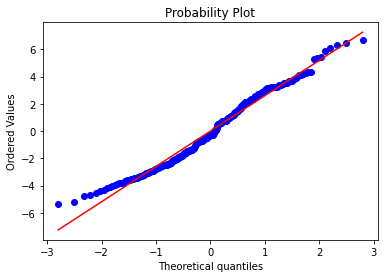

In [43]:
import scipy as sp
import matplotlib.pyplot as plt

sp.stats.probplot(multiLm_results.resid, plot=plt)
plt.show()

꼬리가 짧은 분포

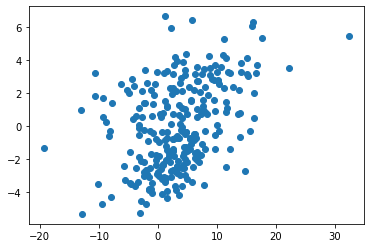

In [44]:
plt.scatter(y_true,multiLm_results.resid)
plt.show()

In [45]:
import statsmodels.stats as stat

stat.diagnostic.het_breuschpagan(multiLm_results.resid, x_train)

(12.316570790313612,
 0.015146059001033501,
 2.533803718031302,
 0.029191354024583713)

잔차의 제곱 = 회귀모형 -> 람다가 0인지 test!

DW 양의 자기상관 (Positive autocorrelation) 

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["factor"]=x_train.columns
vif

,VIF,factor
0,1.21,Rm-Rf
1,1.18,SMB
2,1.15,HML
3,1.43,AMI
4,1.12,PMI


In [47]:
multiLm.exog_names

['const', 'Rm-Rf', 'SMB', 'HML', 'AMI', 'PMI']

In [48]:
Capm =dataset_complete[['Rm', 'Rf', 'Rm-Rf']]
Capm

,Rm,Rf,Rm-Rf
1,-14.14,4.78,-18.92
2,-3.88,5.07,-8.95
3,-0.39,5.05,-5.44
4,-18.08,5.06,-23.14
5,0.65,5.12,-4.47
...,...,...,...
264,5.51,1.44,4.08
265,-10.78,1.28,-12.06
266,1.47,1.39,0.08
267,3.05,1.45,1.60


In [49]:
x_train = Capm['Rm-Rf']
y_true = Capm['Rm']+Capm['Rf']

Lm = sm.OLS(y_true, sm.add_constant(x_train))

Lm_results = Lm.fit()
Lm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1268.
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          3.35e-103
Time:                        23:49:10   Log-Likelihood:                -642.84
No. Observations:                 268   AIC:                             1290.
Df Residuals:                     266   BIC:                             1297.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3962      0.172     31.340      0.000       5.057       5.735
Rm-Rf          0.8705      0.024     35.609      0.000       0.822       0.919
==============================================================================
Omnibus:                       31.944   Durbin-Watson:                   0.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.905
Skew:                           0.209   Prob(JB):                      0.00429
Kurtosis:                       2.105   Cond. No.                         7.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
FF3 =dataset_complete[['Rm', 'Rf', 'Rm-Rf', 'HML', 'SMB']]
FF3

,Rm,Rf,Rm-Rf,HML,SMB
1,-14.14,4.78,-18.92,9.30,-2.82
2,-3.88,5.07,-8.95,-14.32,49.52
3,-0.39,5.05,-5.44,8.06,8.00
4,-18.08,5.06,-23.14,4.85,-7.23
5,0.65,5.12,-4.47,-10.12,-6.82
...,...,...,...,...,...
264,5.51,1.44,4.08,2.94,4.57
265,-10.78,1.28,-12.06,7.26,3.43
266,1.47,1.39,0.08,1.67,1.28
267,3.05,1.45,1.60,-0.68,4.59


In [51]:
x_train = FF3[['Rm-Rf', 'HML', 'SMB']]
y_true = FF3['Rm']+FF3['Rf']

MLm = sm.OLS(y_true, sm.add_constant(x_train))

MLm_results = MLm.fit()
MLm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     433.8
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.09e-101
Time:                        23:49:20   Log-Likelihood:                -639.12
No. Observations:                 268   AIC:                             1286.
Df Residuals:                     264   BIC:                             1301.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3076      0.175     30.284      0.000       4.963       5.653
Rm-Rf          0.8798      0.025     35.776      0.000       0.831       0.928
HML            0.0897      0.038      2.385      0.018       0.016       0.164
SMB           -0.0259      0.030     -0.859      0.391      -0.085       0.033
==============================================================================
Omnibus:                       11.958   Durbin-Watson:                   0.283
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.689
Skew:                           0.270   Prob(JB):                       0.0214
Kurtosis:                       2.370   Cond. No.                         7.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# TEST AND TRAINGING

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = dataset_complete[['Rm-Rf', 'SMB', 'HML', 'AMI', 'PMI']]
Y = dataset_complete['Rm']+dataset_complete['Rf']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

lr = LinearRegression().fit(x_train, y_train)
lr.score(x_train, y_train), lr.score(x_test, y_test)
lr.predict(x_test)

array([  0.51169635,   4.88615963,   5.18964031,   2.45497337,
        10.82820278, -14.14650304,   6.36243428,  -0.72619144,
        -4.41685042,   6.72298828,   5.97926399,   7.89769554,
         0.29549928,   5.90739629,   8.83022472,   5.4700535 ,
         0.17983769,  12.88672888,   7.18587155,  -2.26319731,
         2.67227019,  10.35710724,   5.106919  ,  -7.02332764,
         3.63851329,   1.49867071,   3.80369357,   0.541184  ,
        -6.72098937,   0.94266682,   2.15116479,   3.53527031,
        -0.91140981,   4.31095731,   4.31678959,  -9.96824089,
         5.83138243,   4.42374552,   9.32857857,   6.63386843,
         3.5111503 ,   5.62316866,   6.44810952,   2.16496317,
         9.62085005,  11.33083141,   4.51649963,  14.21655943,
         6.85871812,  -3.01899779,  -3.42919897,   0.11306645,
         6.1069289 ,  -4.59509745])

In [53]:
b = lr.predict(x_test)
e = b - y_test
e

38    -0.95
50    -2.21
94    -5.96
172    0.84
120    0.51
4     -1.13
124    1.29
18    -3.24
12    -6.58
163    0.65
205    2.82
256    4.31
96    -4.01
83    -3.76
26    -3.33
201    3.32
99    -4.54
192   -0.98
108   -0.76
29    -1.65
268    3.66
142   -1.12
181    0.39
243    3.13
167    0.68
231    1.76
48    -2.30
193    2.61
15    -1.78
137    0.34
159    0.00
131    0.34
218    3.59
90    -3.14
60    -1.34
1     -0.61
210    2.53
171    1.01
123    1.42
253    3.61
122    1.69
238    2.47
232    1.61
187    2.48
16    -6.30
229    1.73
211    3.38
115    0.37
199    3.17
110    2.70
37    -2.22
121    2.40
116    1.69
265    4.91
dtype: float64

In [54]:
test = sm.stats.omni_normtest(e)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  3.628
P-value     :  0.163


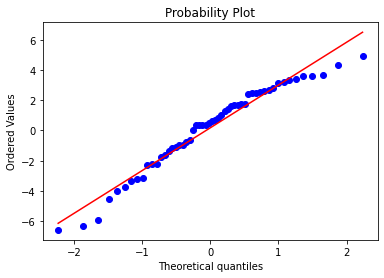

In [55]:
sp.stats.probplot(e, plot=plt)
plt.show()

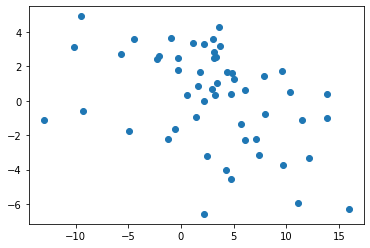

In [56]:
plt.scatter(y_test,e)
plt.show()

In [57]:
stat.diagnostic.het_breuschpagan(e, x_test)

(12.834536998372293,
 0.012113222716159295,
 3.0554366066300553,
 0.0176959654047095)

In [58]:
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(x_test.values, i) for i in range(x_test.shape[1])]
vif["factor"]=x_test.columns
vif

,VIF,factor
0,1.08,Rm-Rf
1,1.27,SMB
2,1.27,HML
3,1.26,AMI
4,1.27,PMI


In [67]:
x_train = dataset_complete[['Rm-Rf', 'HML', 'PMI']]
y_true = dataset_complete['Rm']+dataset_complete['Rf']

multiLm = sm.OLS(y_true, sm.add_constant(x_train))

multiLm_results = multiLm.fit()
multiLm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     438.4
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          3.41e-102
Time:                        23:53:39   Log-Likelihood:                -637.93
No. Observations:                 268   AIC:                             1284.
Df Residuals:                     264   BIC:                             1298.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2542      0.176     29.914      0.000       4.908       5.600
Rm-Rf          0.8732      0.025     35.154      0.000       0.824       0.922
HML            0.0990      0.037      2.687      0.008       0.026       0.172
PMI           -0.0825      0.047     -1.757      0.080      -0.175       0.010
==============================================================================
Omnibus:                       18.111   Durbin-Watson:                   0.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.813
Skew:                           0.236   Prob(JB):                       0.0122
Kurtosis:                       2.248   Cond. No.                         7.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
x_train = dataset_complete[['Rm-Rf', 'HML', 'AMI']]
y_true = dataset_complete['Rm']+dataset_complete['Rf']

multiLm = sm.OLS(y_true, sm.add_constant(x_train))

multiLm_results = multiLm.fit()
multiLm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     436.5
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          5.46e-102
Time:                        23:53:53   Log-Likelihood:                -638.41
No. Observations:                 268   AIC:                             1285.
Df Residuals:                     264   BIC:                             1299.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2383      0.179     29.300      0.000       4.886       5.590
Rm-Rf          0.8682      0.026     33.358      0.000       0.817       0.919
HML            0.1133      0.039      2.920      0.004       0.037       0.190
AMI            0.0305      0.021      1.461      0.145      -0.011       0.072
==============================================================================
Omnibus:                       14.479   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.287
Skew:                           0.260   Prob(JB):                       0.0159
Kurtosis:                       2.314   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""